In [46]:
# This Notebook is created with VS Code on Windows
# Create python virtual environment
!python -m venv .venv
# If you want to use it on macOS/Linux
# You may need to run sudo apt-get install python3-venv first
#python3 -m venv .venv

# Install Python Packages
!pip install --user --upgrade pip
!pip install --upgrade setuptools
!pip install --user seaborn
!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user plotly
!pip install --user nbformat
!pip install --user surprise


  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\oli\appdata\local\programs\python\python38\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Oli\\AppData\\Local\\Temp\\pip-install-jibnz200\\scikit-surprise_07dc192d3cf347769fae216d5b05a944\\setup.py'"'"'; __file__='"'"'C:\\Users\\Oli\\AppData\\Local\\Temp\\pip-install-jibnz200\\scikit-surprise_07dc192d3cf347769fae216d5b05a944\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Oli\AppData\Local\Temp\pip-wheel-dz4_1ymq'
       cwd: C:\Users\Oli\AppData\Local\Temp\pip-install-jibnz200\scikit-surprise_07dc192d3cf347769fae216d5b05a944\
  Complete output (49 lines):
  running bdist_wheel
  running build
  running build_py
  creating bui

In [3]:
import numpy as np # maths
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [18, 8]

In [4]:
# Import Tables
reviews = pd.read_csv('./ml-1m/ratings.dat', names=['userId', 'movieId', 'rating', 'timestamp'], delimiter='::', engine='python')
movies = pd.read_csv('./ml-1m/movies.dat', names=['movieId', 'title', 'genres'], delimiter='::', engine='python')
users = pd.read_csv('./ml-1m/users.dat', names=['userId', 'gender', 'age', 'occupation', 'zip'], delimiter='::', engine='python')

# Print Table shape
print('Reviews shape:', reviews.shape)
print('Users shape:', users.shape)
print('Movies shape:', movies.shape)

Reviews shape: (1000209, 4)
Users shape: (6040, 5)
Movies shape: (3883, 3)


In [5]:
# Drop unused Attributes
reviews.drop(['timestamp'], axis=1, inplace=True) # Time
users.drop(['zip'], axis=1, inplace=True) # Zip-Code

# Extract the movie year from title to extra attrbute
movies['release_year'] = movies['title'].str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)

In [6]:
# Print movie table
movies.head()

movieId                               title                        genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

  release_year  
0         1995  
1         1995  
2         1995  
3         1995  
4         1995

In [7]:
# Changed feature values based on README_users.txt

ages_map = {1: 'Under 18',
            18: '18 - 24',
            25: '25 - 34',
            35: '35 - 44',
            45: '45 - 49',
            50: '50 - 55',
            56: '56+'}

occupations_map = {0: 'Not specified',
                   1: 'Academic / Educator',
                   2: 'Artist',
                   3: 'Clerical / Admin',
                   4: 'College / Grad Student',
                   5: 'Customer Service',
                   6: 'Doctor / Health Care',
                   7: 'Executive / Managerial',
                   8: 'Farmer',
                   9: 'Homemaker',
                   10: 'K-12 student',
                   11: 'Lawyer',
                   12: 'Programmer',
                   13: 'Retired',
                   14: 'Sales / Marketing',
                   15: 'Scientist',
                   16: 'Self-Employed',
                   17: 'Technician / Engineer',
                   18: 'Tradesman / Craftsman',
                   19: 'Unemployed',
                   20: 'Writer'}

gender_map = {'M': 'Male', 'F': 'Female'}

users['age'] = users['age'].map(ages_map)
users['occupation'] = users['occupation'].map(occupations_map)
users['gender'] = users['gender'].map(gender_map)

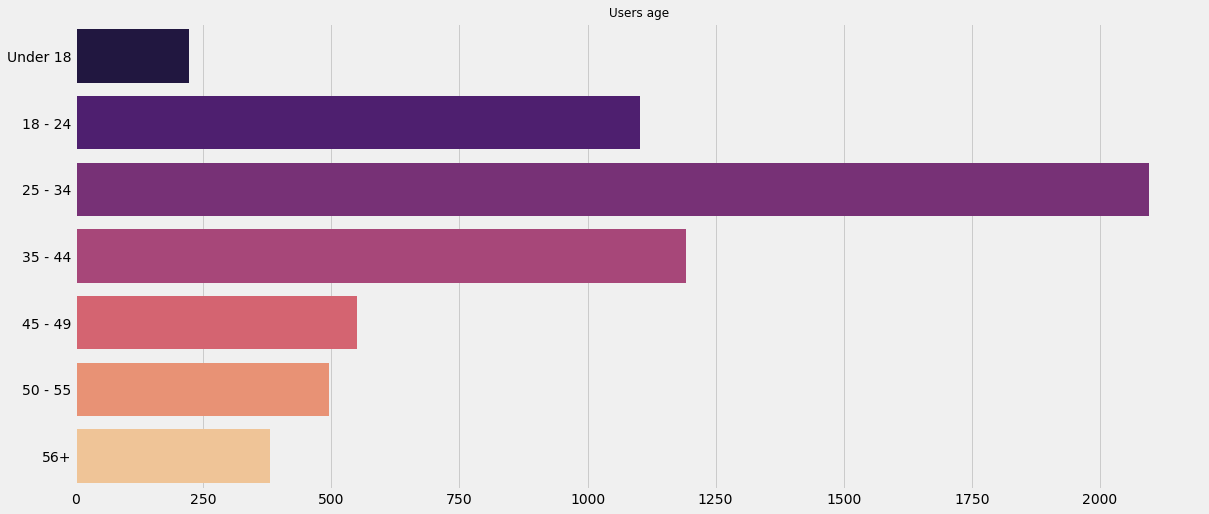

In [8]:
# Plot age kategories

age_reindex = ['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 49', '50 - 55', '56+']
age_counts = users['age'].value_counts().reindex(age_reindex)
sns.barplot(x=age_counts.values,
            y=age_counts.index,
            palette='magma').set_title(
                'Users age', fontsize=12)

plt.show()

In [9]:
# Plot gender of users
gender_counts = users['gender'].value_counts()
colors1 = ['lightblue', 'pink']
pie = go.Pie(labels=gender_counts.index,
             values=gender_counts.values,
             marker=dict(colors=colors1),
             hole=0.5)
layout = go.Layout(title='Gender Users', font=dict(size=12), legend=dict(orientation='h'))

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [10]:
# Merge reviews, movie and user dataset
final_df = reviews.merge(movies, on='movieId', how='left').merge(users, on='userId', how='left')
print('final_df shape:', final_df.shape)
final_df.head()

final_df shape: (1000209, 9)


userId  movieId  rating                                   title  \
0       1     1193       5  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3        James and the Giant Peach (1996)   
2       1      914       3                     My Fair Lady (1964)   
3       1     3408       4                  Erin Brockovich (2000)   
4       1     2355       5                    Bug's Life, A (1998)   

                         genres release_year  gender       age    occupation  
0                         Drama         1975  Female  Under 18  K-12 student  
1  Animation|Children's|Musical         1996  Female  Under 18  K-12 student  
2               Musical|Romance         1964  Female  Under 18  K-12 student  
3                         Drama         2000  Female  Under 18  K-12 student  
4   Animation|Children's|Comedy         1998  Female  Under 18  K-12 student

In [39]:
final_df[final_df['age'] == '18 - 24']['title'].value_counts()[:10].to_frame()

title
American Beauty (1999)                                715
Star Wars: Episode VI - Return of the Jedi (1983)     586
Star Wars: Episode V - The Empire Strikes Back ...    579
Matrix, The (1999)                                    567
Star Wars: Episode IV - A New Hope (1977)             562
Braveheart (1995)                                     544
Saving Private Ryan (1998)                            543
Jurassic Park (1993)                                  541
Terminator 2: Judgment Day (1991)                     529
Sixth Sense, The (1999)                               514

In [44]:
# Print movie / user sum
n_movies = final_df['movieId'].nunique()
n_users = final_df['userId'].nunique()

print('Number of movies:', n_movies)
print('Number of users:', n_users)                                

Number of movies: 3706
Number of users: 6040


In [45]:
# implement SVD with Python SurPRISE, a Python Recommendation Framework

from surprise import Reader, Dataset, SVD, SVDpp
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(final_df[['userId', 'movieId', 'rating']], reader=reader)

svd = SVD(n_factors=50)
svd_plusplus = SVDpp(n_factors=50)

# train with SVD
trainset = dataset.build_full_trainset()
svd.fit(trainset)
# train with SVD++, ATTENTION this take a LONG TIME
# svd_plusplus.fit(trainset)


ModuleNotFoundError: No module named 'surprise'